## Entropy and mutual information

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# log2(n) 2**x = n
np.log2(2)   # this is coin flip
# np.log2(4)   # two coin flips 
# np.log2(8)

1.0

In [10]:
# same thing but in terms of prob of outcome
N = 8
-np.log2( 1 / N ) # log2(1) - log2(N), log2(1) = 0

3.0

In [21]:
# average uncert over set of outcomes
N=2

H = 0

for i in np.arange(N):
    
    H += -( (1/N) * np.log2( 1 / N ) )

print(H)

1.0


In [23]:
e_heads = ( .999 * np.log2( .999 ) ) * -1
e_tails = ( 0.001 * np.log2( .001 ) ) * -1
H = e_heads + e_tails
print(H)



0.011407757737461138


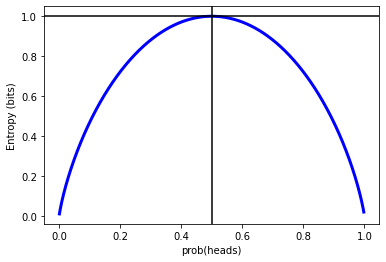

In [18]:
# biased coin flips...relationship between prob and entropy

probs = np.arange(.001, .999, .001)

px = np.zeros ( ( 2, len( probs ) ) )

px[0,:] = probs   # p(head)
px[1,:] = 1 - probs # p(tails)

e_heads = ( px[0,:] * np.log2( px[0,:] ) ) * -1
e_tails = ( px[1,:] * np.log2( px[1,:] ) ) * -1


H = e_heads + e_tails

plt.plot(probs, H, 'b', linewidth = 3)
plt.axvline(.5, color='k')
plt.axhline(1, color='k')
plt.xlabel('prob(heads)')
plt.ylabel('Entropy (bits)')
plt.show()




# Mutual info (MI)
`MI = H(X) - H(X|Y)`

In [27]:
np.random.seed(0)

N = 100000

x = np.round( np.random.rand(N) )
y = np.round( np.random.rand(N) )

# prob of matching values
p = .999
ind = int(p*N)

# now p slots in y is equal to x
y[:ind] = x[:ind]

px = np.zeros(2)
 
px[0] = np.sum(x) / N  # p(1)
px[1] = 1 - px[0]      # p(0)

# entropy of x
Hx = -np.sum( px * np.log2(px) )

Hxy = 0

# loop over possible values of y
for i in np.arange(2):
    
    py = np.sum(y == i) / N
    
    tmp = 0
    
    # loop over all possible values of x
    for j in np.arange(2):
    
        px_y = np.sum( (x==j) & (y==i) ) / np.sum( y==i )
        tmp += -( px_y * np.log2( px_y ) )
        
    Hxy += (py * tmp)   
    
MI = Hx - Hxy

print(f'Entropy of X {Hx}, Mutual Information {MI}')

Entropy of X 0.9999991271693243, Mutual Information 0.9939119808203132


In [29]:
# LAST example...
from sklearn.metrics import mutual_info_score
from math import isclose 

# sklearn uses nats
sklearn_MI = mutual_info_score(x,y) * np.log2(np.e)

assert( isclose(MI, sklearn_MI) )

print(MI)
print(sklearn_MI)

0.9939119808203132
0.9939119808203133


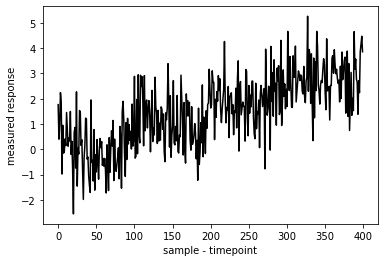

In [42]:
np.random.seed(0)

N = 400

num_conds = 4

cond_means = [0,1,2,3]

resp = []
for i in np.arange(num_conds):
    
    resp = np.hstack((resp, np.random.randn(int(N/num_conds)) + cond_means[i]))

plt.plot(np.arange(N), resp, 'k')
plt.xlabel('sample - timepoint')
plt.ylabel('measured response')
plt.show()



In [44]:

edges = np.histogram_bin_edges(resp, bins = 100)

bin_y = np.digitize( resp, edges )

conds = np.repeat(np.arange(4), N/num_conds)

MI = mutual_info_score(conds, bin_y) * np.log2(np.e)
print(MI)

0.8784062216633213
